# M4 | Research Investigation Notebook

In this notebook, you will do a research investigation of your chosen dataset in teams. You will begin by formally selecting your research question (task 0), then processing your data (task 1), creating a predictive model (task 2), evaluating your model's results (task 3), and describing the contributions of each team member (task 4).

For grading, please make sure your notebook has all cells run and is stored in your team's [Github Classroom repository](https://classroom.github.com/a/CNxME27U). You will also need to write a short, 2 page report about your design decisions as a team, to be stored in your repository. The Milestone 4 submission will be the contents of your repository at the due date (April 28 at 23:59 CET).

## Brief overview of Calcularis
[Calcularis](https://school.alemira.com/de/calcularis/) by Alemira School is a mathematics learning program developed with neuroscientists and computer scientists from ETH Zurich. It promotes the development and interaction of the different areas of the brain that are responsible for processing numbers and quantities and solving mathematical tasks. Calcularis can be used from 1st grade to high school. Children with dyscalculia also benefit in the long term and overcome their arithmetic weakness.

The Calcularis dataset has three main tables:
* ***users***: meta information about users (i.e. total time spent learning with Calcularis, geographic location).
* ***events***: events done by the users in the platform (i.e. playing a game, selecting a new animal in the zoo simulation).
* ***subtasks***: sub-tasks with answer attempts solved by users, primarily in the context of game events.

These tables and useful metadata information are described in detail in the [Milestone 2 data exploration notebook](https://github.com/epfl-ml4ed/mlbd-2023/blob/main/project/milestone-02/m2_calcularis_sciper.ipynb).

We have provided access to the [full dataset](https://moodle.epfl.ch/mod/forum/discuss.php?d=88179) (~65k users) and a randomly selected subset (~1k users from M2). We have also provided access to a [test account to experiment with Calcularis](https://moodle.epfl.ch/mod/forum/discuss.php?d=88094). You should provide arguments and justifications for all of your design decisions throughout this investigation. You can use your M3 responses as the basis for this discussion.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the tables of the data set as dataframes.

DATA_DIR_full_dataset = './../../../data_mlbd/data project/' # You many change the directory
DATA_DIR_small_dataset = './../../../data_mlbd/00_data_1000_students/'

# You can use the nrows=X argument in pd.read_csv to truncate your data
#users = pd.read_csv('{}/calcularis_small_users.csv'.format(DATA_DIR_small_dataset), index_col=0)
#events = pd.read_csv('{}/calcularis_small_events.csv'.format(DATA_DIR_small_dataset), index_col=0)
#subtasks = pd.read_csv('{}/calcularis_small_subtasks.csv'.format(DATA_DIR_small_dataset), index_col=0)
users = pd.read_csv('{}/full_calcularis_users.csv'.format(DATA_DIR_full_dataset), index_col=0)
events = pd.read_csv('{}/full_calcularis_events.csv'.format(DATA_DIR_full_dataset), index_col=0)
subtasks = pd.read_csv('{}/full_calcularis_subtasks.csv'.format(DATA_DIR_full_dataset), index_col=0)

In [3]:
print(f'Number of users: {len(users)}')
print(f'Number of events: {len(events)}')
print(f'Number of subtasks: {len(subtasks)}')

Number of users: 64932
Number of events: 2185200
Number of subtasks: 3502884


In [4]:
users.head()

,learning_time_ms,logged_in_time_ms,language,country,start,end
user_id,,,,,,
2,188171589,588863379,nl,NL,2020-08-20T07:13:38.940Z,2022-12-21T08:43:02.329Z
3,51674473,64077203,de,NaN,2018-02-23T08:29:29.769Z,2019-02-01T09:50:40.447Z
4,73967025,128230675,de,CH,2021-09-06T13:31:50.872Z,2023-02-10T07:57:49.752Z
5,41135378,58146142,de,CH,2022-02-22T10:41:26.754Z,2023-01-24T15:11:29.666Z
6,37110540,61017222,de,CH,2021-10-07T09:23:18.558Z,2022-02-14T18:03:09.583Z


In [5]:
events.head()

,user_id,mode,game_name,learning_time_ms,subtasks,number_range,start,end,skill_id,type
event_id,,,,,,,,,,
1,2,NORMAL,Subitizing,13094.0,"[{'hasProperResult': True, 'range': 'R10', 'co...",R10,2020-08-20T07:13:50.876Z,2020-08-20T07:14:30.108Z,1.0,task
3,2,NORMAL,Conversion,15879.0,"[{'answer': 6, 'range': 'R10', 'correct': True...",R10,2020-08-21T07:02:20.112Z,2020-08-21T07:02:36.221Z,3.0,task
4,2,NORMAL,Landing,6075.0,"[{'range': 'R10', 'correct': True, 'lowerBound...",R10,2020-08-24T07:02:59.855Z,2020-08-24T07:03:07.382Z,18.0,task
5,2,NORMAL,Landing,6910.0,"[{'range': 'R10', 'correct': True, 'lowerBound...",R10,2020-08-26T06:47:21.504Z,2020-08-26T06:47:30.050Z,19.0,task
6,2,NORMAL,Calculator,7507.0,"[{'range': 'R20', 'answerMode': 'RESULT', 'cor...",R20,2020-08-26T07:20:58.766Z,2020-08-26T07:21:06.439Z,54.0,task


In [6]:
subtasks.head()

,event_id,user_id,aim,answer,answerMode,availableNumbers,correct,correctAnswerObject,correctNumber,destination,...,timeoutInSeconds,timeoutInSteps,type,upperBound,step,orderIndependent,divisor,larger,smaller,timeout
subtask_id,,,,,,,,,,,,,,,,,,,,,
1,1,2,NaN,4,NaN,NaN,False,1,1.0,NaN,...,NaN,NaN,ConciseSubitizingTaskDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,NaN,2,NaN,NaN,True,NaN,NaN,NaN,...,0.0,2.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,NaN,6,NaN,NaN,True,6,NaN,ARABIC,...,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,7.0,"{'b': 6.7354193, 'a': 7}",NaN,NaN,True,"{'b': 7.0, 'a': 7}",NaN,NaN,...,NaN,NaN,ConciseLandingTaskDescription,7.5,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,1.0,"{'b': 1.0453212, 'a': 1}",NaN,NaN,True,"{'b': 1.0, 'a': 1}",NaN,NaN,...,NaN,NaN,ConciseLandingTaskDescription,1.5,NaN,NaN,NaN,NaN,NaN,NaN


## Task 0: Research Question

**Research question:**

Time series clustering per student to look at the difference between guided training and free training, with the goal of learning what type of learner each student is.

**Approach**

- Clustering on Guided training and free training separetely
- Clustering on multi-dim profiles accross the 2 training modes

## Task 1: Data Preprocessing

In this section, you are asked to preprocess your data in a way that is relevant for the model. Please include 1-2 visualizations of features / data explorations that are related to your downstream prediction task.

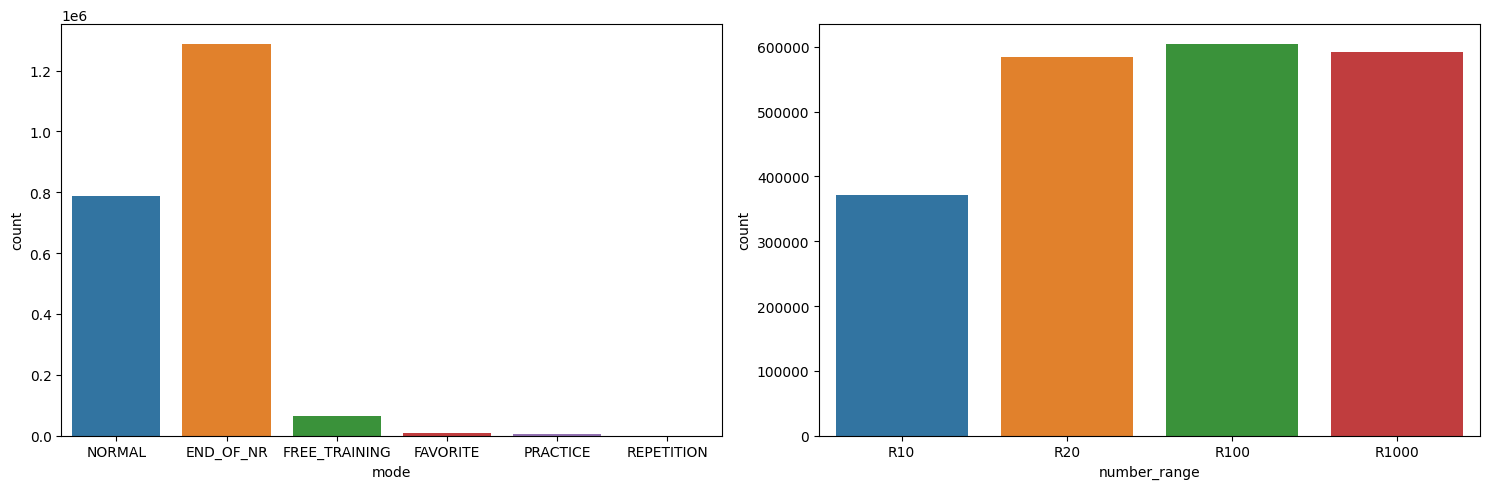

In [7]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(data = pd.DataFrame(events['mode']), x = 'mode', ax = axs[0])
sns.countplot(data = pd.DataFrame(events['number_range']), x = 'number_range', ax = axs[1])
plt.tight_layout()

In [9]:
# sort the events and subtasks dataframe to only keep NORMAL and FREE_TRAINING data
interested_mode = ['NORMAL', 'FREE_TRAINING']
events_sorted = events[events['mode'].isin(interested_mode)]
subtasks_sorted = subtasks[subtasks['event_id'].isin(events_sorted.index)]
print(f'Length of the sorted events dataframe with only NORMAL and FREE_TRAINING data: {len(events_sorted)}\n % kept from original dataset : {round(len(events_sorted)/len(events), 4)}')
print(f'Length of the sorted subtasks dataframe with only NORMAL and FREE_TRAINING data: {len(subtasks_sorted)} \n % kept from original dataset : {round(len(subtasks_sorted)/len(subtasks), 4)}')


Length of the sorted events dataframe with only NORMAL and FREE_TRAINING data: 852371
 % kept from original dataset : 0.3901
Length of the sorted subtasks dataframe with only NORMAL and FREE_TRAINING data: 1169550 
 % kept from original dataset : 0.3339


## Features extraction

In [40]:
# Create the per week dataframes
events_per_week = events_sorted[['user_id', 'game_name', 'learning_time_ms', 'number_range', 'start', 'end']]
subtasks_per_week = subtasks_sorted[['event_id', 'user_id','correct', 'subtask_finished_timestamp']]

subtasks_per_week['week'] = pd.to_datetime(subtasks_sorted['subtask_finished_timestamp']).dt.isocalendar().week
week_start_array = subtasks_per_week.groupby(by = 'user_id')['week'].first()
user_rep = subtasks_per_week.groupby(['user_id'])['event_id'].count()
#print(week_start)
#print(user_rep)
week_start= np.array([])
for idx, i in enumerate(np.array(user_rep)):
    week_start = np.concatenate((week_start, np.full(i, np.array(week_start_array)[idx])))


subtasks_per_week['week_start'] = week_start
subtasks_per_week['week_upd'] = subtasks_per_week['week'] - subtasks_per_week['week_start']

subtasks_per_week.head()

C:\Users\Maxime\AppData\Local\Temp\ipykernel_3160\3574580337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtasks_per_week['week'] = pd.to_datetime(subtasks_sorted['subtask_finished_timestamp']).dt.isocalendar().week


user_id
2          34
3           8
4          36
5           8
6          40
         ... 
64993      35
64994    <NA>
64995       8
64996       6
64997       8
Name: week, Length: 60170, dtype: UInt32
user_id
2         69
3         28
4         23
5         24
6        185
        ... 
64993     14
64994     12
64995      4
64996      7
64997     31
Name: event_id, Length: 60170, dtype: int64


C:\Users\Maxime\AppData\Local\Temp\ipykernel_3160\3574580337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtasks_per_week['week_upd'] = week_upd


,event_id,user_id,correct,week,week_upd
subtask_id,,,,,
1,1,2,False,34,34.0
2,1,2,True,34,34.0
3,3,2,True,34,34.0
4,4,2,True,35,34.0
5,5,2,True,35,34.0


In [17]:
WEEKS_A_YEAR = 52 
df_events = events_sorted[['user_id', 'game_name', 'learning_time_ms', 'number_range', 'start', 'end']]
df_subtasks = subtasks_sorted[['event_id', 'user_id','correct', 'subtask_finished_timestamp']]

years = pd.to_datetime(df_events['start'], infer_datetime_format=True).dt.isocalendar().year
first_year = years.min()
df_events["week"] = pd.to_datetime(df_events['start'], infer_datetime_format=True).dt.isocalendar().year-first_year
df_events["week"] = df_events["week"]*WEEKS_A_YEAR +pd.to_datetime(events['start'], infer_datetime_format=True).dt.isocalendar().week
start_weeks = pd.Series(df_events.groupby(by="user_id").min()["week"], name="start_weeks")
df_subtasks["week"] = pd.to_datetime(df_subtasks['subtask_finished_timestamp'], infer_datetime_format=True).dt.isocalendar().year-first_year
df_subtasks["week"] = df_subtasks["week"]*WEEKS_A_YEAR+pd.to_datetime(df_subtasks['subtask_finished_timestamp'], infer_datetime_format=True).dt.isocalendar().week
# Now actually change it to each user starting with week 0
for user, start in start_weeks.items():
    df_events.loc[df_events["user_id"] == user, "week"] = df_events[df_events["user_id"] == user]["week"]-start
    df_subtasks.loc[df_subtasks["user_id"] == user, "week"] = df_subtasks[df_subtasks["user_id"] == user]["week"]-start

C:\Users\Maxime\AppData\Local\Temp\ipykernel_14124\373877476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events["week"] = pd.to_datetime(df_events['start'], infer_datetime_format=True).dt.isocalendar().year-first_year
C:\Users\Maxime\AppData\Local\Temp\ipykernel_14124\373877476.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events["week"] = df_events["week"]*WEEKS_A_YEAR +pd.to_datetime(events['start'], infer_datetime_format=True).dt.isocalendar().week
C:\Users\Maxime\AppData\Local\Temp\i

In [39]:
df_events['difficulty'] = df_events['number_range'].replace({'R10': 1, 'R20': 2, 'R100': 3, 'R1000': 4})
#df_events.loc[df_events2['number_range'] == 'R10', 'number_range'] = 1
df_events.head()

C:\Users\Maxime\AppData\Local\Temp\ipykernel_14124\1886640849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['difficulty'] = df_events['number_range'].replace({'R10': 1, 'R20': 2, 'R100': 3, 'R1000': 4})


,user_id,game_name,learning_time_ms,number_range,start,end,week,difficulty
event_id,,,,,,,,
1,2,Subitizing,13094.0,R10,2020-08-20T07:13:50.876Z,2020-08-20T07:14:30.108Z,0,1
3,2,Conversion,15879.0,R10,2020-08-21T07:02:20.112Z,2020-08-21T07:02:36.221Z,0,1
4,2,Landing,6075.0,R10,2020-08-24T07:02:59.855Z,2020-08-24T07:03:07.382Z,1,1
5,2,Landing,6910.0,R10,2020-08-26T06:47:21.504Z,2020-08-26T06:47:30.050Z,1,1
6,2,Calculator,7507.0,R20,2020-08-26T07:20:58.766Z,2020-08-26T07:21:06.439Z,1,2


In [36]:
df_subtasks.head()

,event_id,user_id,correct,subtask_finished_timestamp,week
subtask_id,,,,,
1,1,2,False,2020-08-20T07:14:29.954Z,0
2,1,2,True,2020-08-20T07:14:29.954Z,0
3,3,2,True,2020-08-21T07:02:35.954Z,0
4,4,2,True,2020-08-24T07:03:07.167Z,1
5,5,2,True,2020-08-26T06:47:29.872Z,1


In [42]:
#Extracting the features
features = pd.DataFrame()
features['# games'] = df_events.groupby(['user_id', 'week'])['game_name'].count()
features['# different games'] = df_events.groupby(['user_id', 'week'])['game_name'].unique().apply(lambda example : len(example))
features['learning_time'] = df_events.groupby(['user_id', 'week'])['learning_time_ms'].sum()
features['% correct'] = df_subtasks.groupby(['user_id','week'])['correct'].apply(lambda example: sum(example)/len(example))
features['avg difficulty'] = df_events.groupby(['user_id','week'])['difficulty'].mean()
features.head()

# games  # different games  learning_time  % correct  \
user_id week                                                         
2       0           2                  2        28973.0   0.666667   
        1           4                  3        22240.0   1.000000   
        3           3                  1        19819.0   0.666667   
        4           1                  1         7239.0   1.000000   
        5           2                  1        68088.0   0.500000   

              avg difficulty  
user_id week                  
2       0                1.0  
        1                1.5  
        3                3.0  
        4                3.0  
        5                3.0

*Your discussion about your processing decisions goes here*

## Task 2: Model Building

Train a model for your research question. 

In [ ]:
# Your code for training a model goes here

*Your discussion about your model training goes here*

## Task 3: Model Evaluation
In this task, you will use metrics to evaluate your model.

In [ ]:
# Your code for model evaluation goes here

*Your discussion/interpretation about your model's behavior goes here*

## Task 4: Team Reflection
Please describe the contributions of each team member to Milestone 4. Reflect on how you worked as team: what went well, what can be improved for the next milestone?

*Your discussion about team responsibilities goes here*